In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2 ,os
from math import ceil
import pickle
import time

def get_images_names(path):
    files_name = os.listdir( path )
    files_name.sort()
    return files_name

def read_imges(path,images_name):
    images=[]
    for image in images_name:
        img = cv2.imread(path+image,0)
        if img is not None:
            scale_percent = 50
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)
            img = cv2.GaussianBlur(img, (3, 3), 0)            
            img = cv2.resize(img, dim)
            images.append(img)
        else:
            print('Can not read image files!',path+image)
    return images

def segment_images(images):
    seg_images=[]
    for image in images:
        otsu_threshold, otsout = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        otsout = cv2.normalize(otsout, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        seg_images.append(np.array(otsout))
    return seg_images
        
def get_foreground(segmented_image):
    foreground_pixels = []
    foreground_value = 0
    for img in segmented_image:
        for y in range(img.shape[0]):
            for x in range(img.shape[1]):
                if img[y, x] == foreground_value:
                    foreground_pixels.append((x, y)) # add it to my list of (x, y) coordinate pairs
    return foreground_pixels

def save_fg(images):
    with open('Otsu_fg_pixels.pkl', 'wb') as f:
        pickle.dump(images, f)
    
def load_fg():
    with open('Otsu_fg_pixels.pkl', 'rb') as f:
        loaded_fg = pickle.load(f)
    return loaded_fg

In [2]:
path='test/'
#get all images name
start_time = time.time()

images_name = get_images_names(path)
images = read_imges(path,images_name)

print("--- execution time %s seconds ---" % (time.time() - start_time))

Can not read image files! test/Abyssinian_34.jpg
--- execution time 5.583715915679932 seconds ---


In [3]:
seg_img=[]
start_time = time.time()

for img in images:
    seg_img.append(segment_images(img))
    
print("--- execution time: %s seconds ---" % (time.time() - start_time))

--- execution time: 2.294624090194702 seconds ---


In [4]:
fg=[]
start_time = time.time()

for img in seg_img:
    fg.append(get_foreground(img))
print("--- execution time %s seconds ---" % (time.time() - start_time))

--- execution time 147.1975600719452 seconds ---


In [13]:
fg=[]
for i in [0,1]:
    fg.append(get_foreground(seg_img[i]))

In [11]:
print(type(fg))
print(len(fg))

<class 'list'>
1108


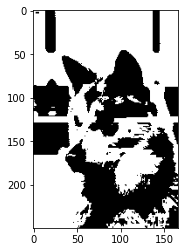

In [12]:
plt.imshow(seg_img[990],'gray')

In [13]:
start_time = time.time()
save_fg(fg)
print("--- execution time %s seconds ---" % (time.time() - start_time))

--- execution time 21.24526810646057 seconds ---
